In [41]:
import requests
import pandas as pd
from matplotlib import pyplot as plt    

def get_data(accession_id):
    url = f"http://iupred3.elte.hu/iupred3/{accession_id.lower()}.json"
    return requests.get(url).json()

protein_inf = [
    ('HLH-1', 'P22980'),
    ('ELT-1', 'P28515'),
    ('ELT-2', 'Q10655'),
    ('ELT-3', 'B7WN96'),
    ('PHA-4', 'Q17381'),
    ('HND-1', 'Q18612'),
]

df_iupred = pd.DataFrame(protein_inf, columns=['name', 'accession_id'])

data_list = [get_data(acc_id) for acc_id in df_iupred['accession_id']]

df_iupred['score'] = [data['iupred2'] for data in data_list]
df_iupred['sequence'] = [data['sequence'] for data in data_list]


In [40]:
df_iupred

,name,accession_id,score,sequence
0,HLH-1,P22980,"[0.8118799829415453, 0.8145951540808544, 0.816...",MNTETSTQSAPSDTYDTSIYYNSSPRVTANDITTLTSFAAPAPQVL...
1,ELT-1,P28515,"[0.36633412981069624, 0.33925723978919536, 0.3...",MDYEGKPVEFTLGTSSGGASLAPTSSTTAASIAPFSYNTSATNYYN...
2,ELT-2,Q10655,"[0.7098643404410261, 0.549343642188473, 0.4860...",MDNNYNDNVNGWAEMEPSQPMGGLRLPTQNMDPPEQNNESQLSELP...
3,ELT-3,B7WN96,"[0.46633264031620386, 0.45851889445947014, 0.4...",METANYYLPSPPYSSTSSSDSRESRMNTPIPTTYSEENVNSLFHLM...
4,PHA-4,Q17381,"[0.8793435222592042, 0.8721660850149123, 0.840...",MTSPSSDEDIIDIRVIKEEPESEPDSEAEPATTTNSTDSEDSVEQE...
5,HND-1,Q18612,"[0.6771756582067806, 0.6312157692254354, 0.596...",MVKSTTAGNNAVSSLESTDSKKSRKEKSREKEHRRAQCINSAFEIL...


In [ ]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np

def get_data(accession_id):
    url = f"http://iupred3.elte.hu/iupred3/{accession_id.lower()}.json"
    return requests.get(url).json()

protein_inf = [
    ('HLH-1', 'P22980'),
    ('ELT-1', 'P28515'),
    ('ELT-2', 'Q10655'),
    ('ELT-3', 'B7WN96'),
    ('PHA-4', 'Q17381'),
    ('HND-1', 'Q18612'),
]

df_iupred = pd.DataFrame(protein_inf, columns=['name', 'accession_id'])

data_list = [get_data(acc_id) for acc_id in df_iupred['accession_id']]

df_iupred['score'] = [data['iupred2'] for data in data_list]
df_iupred['sequence'] = [data['sequence'] for data in data_list]



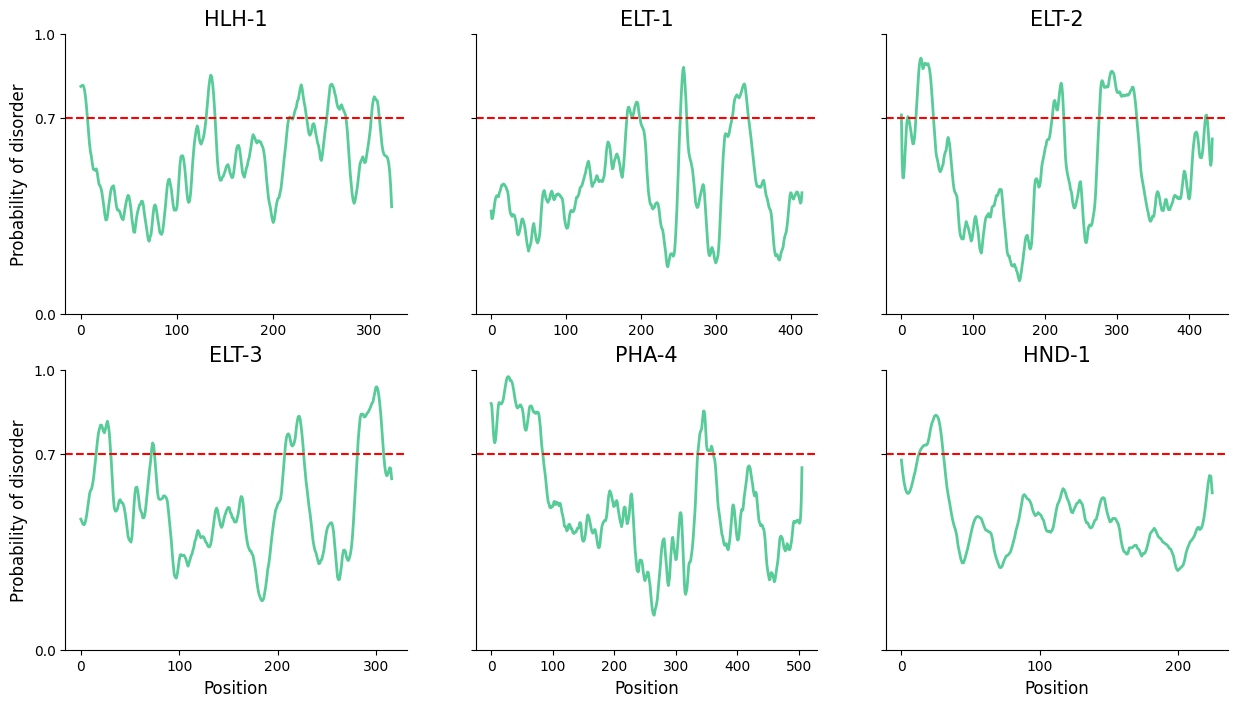

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.flatten()

for axs in axes: 
    axs.spines[['top', 'right']].set_visible(False)

thresh = 0.7

for ax, (i, row) in zip(axes, df_iupred.iterrows()):
    x = np.arange(len(row['score']))
    ax.plot(x, row['score'], color='#57cc99', linewidth=2)
    ax.axhline(thresh, color='red', linestyle='--', linewidth=1.5)
    ax.set_title(row['name'], fontsize=15)
    ax.set_yticks([0, thresh, 1])
    ax.set_ylim(0, 1)
    x_ticks = np.arange(0, len(x)+1, 100)
    ax.set_xticks(x_ticks)
    if i >= 3:ax.set_xlabel('Position', fontsize=12)
    if i == 0 or i == 3: ax.set_ylabel('Probability of disorder', fontsize=12)
    

# plt.tight_layout()
plt.show()

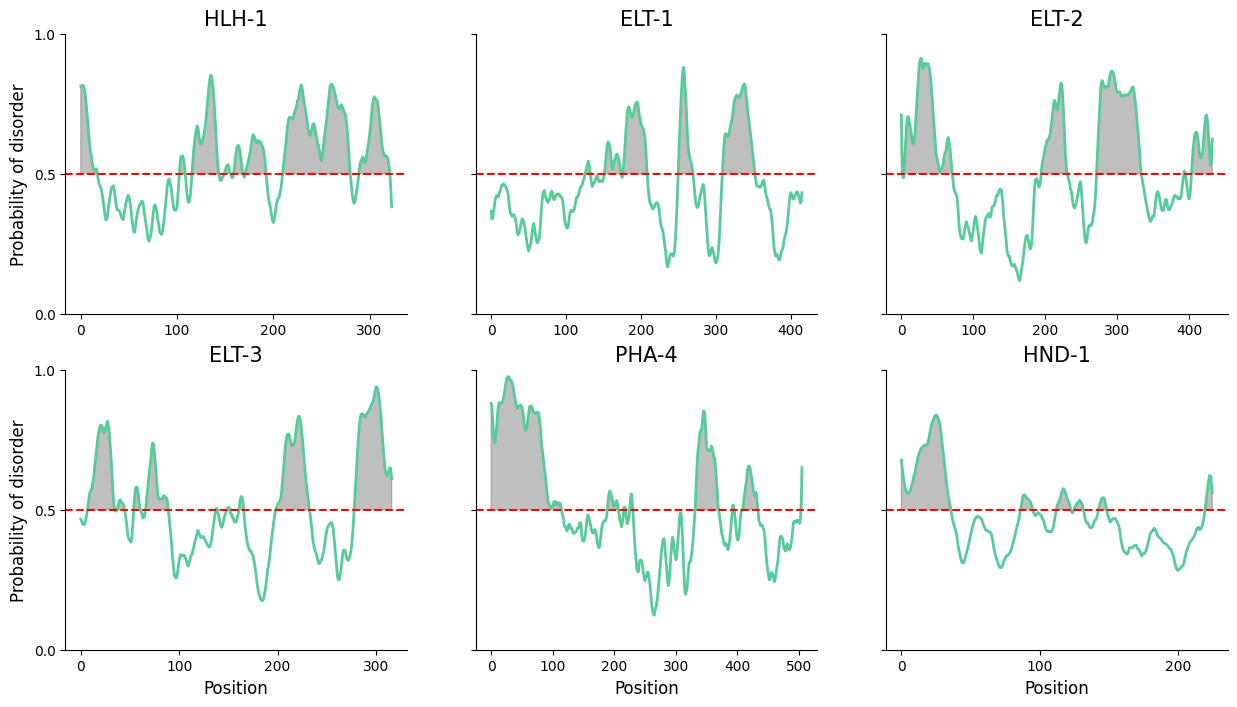

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.flatten()

for axs in axes:
    axs.spines[['top', 'right']].set_visible(False)

thresh = 0.5

for ax, (i, row) in zip(axes, df_iupred.iterrows()):
    x = np.arange(len(row['score']))
    y = np.array(row['score'])
    ax.plot(x, y, color='#57cc99', linewidth=2)
    ax.axhline(thresh, color='red', linestyle='--', linewidth=1.5)
    ax.fill_between(x, y, thresh, where=(y > thresh), color='grey', alpha=0.5)
    ax.set_title(row['name'], fontsize=15)
    ax.set_yticks([0, thresh, 1])
    ax.set_ylim(0, 1)
    x_ticks = np.arange(0, len(x)+1, 100)
    ax.set_xticks(x_ticks)
    if i >= 3: ax.set_xlabel('Position', fontsize=12)
    if i == 0 or i == 3: ax.set_ylabel('Probability of disorder', fontsize=12)

plt.show()
